In [2]:
import os
from itertools import permutations, product
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# magic line to have in-notebook interactive plots
%matplotlib notebook

In [5]:
files = os.listdir("./gt_bbox")
print("num of files: ",len(files))
pool = [1, 2, 3, 4, 5, 6]
perm = []
for x in permutations(pool, 2):
    perm.append(x)
data = np.zeros(shape= (30,  6))


num of files:  25260


In [6]:
seq_length = 165000

In [7]:
time_seq_dic = {ele: [] for ele in perm}

cur_obj = 1
cam_seq = []
frame_seq = []
for file in files:
    if file == "Thumbs.db":
        continue
        
    obj_id = int(file[:4])
    cam_id = int(file[6])
    seq_id = int(file[8])
    frame_id = int(file[10:16])
    frame_num = frame_id + seq_length * (seq_id - 1)
    
    if obj_id != cur_obj:
#         if cur_obj == 3:
#             break;
    
        cam_seq = np.array(cam_seq)
        frame_seq = np.array(frame_seq)
        frame_seq_index = np.argsort(frame_seq)
        frame_seq_sorted = np.sort(frame_seq)
        
        #print(frame_seq_index)
        #print(cam_seq[frame_seq_index])
        #print(frame_seq_sorted)
        
        cam_tuple_before = ()
        cam_tuple_after = ()
        for i in range(len(frame_seq_sorted)-1):
            travel_time = frame_seq_sorted[i+1] - frame_seq_sorted[i]
            cam_id_before = cam_seq[frame_seq_index[i]]
            cam_id_after = cam_seq[frame_seq_index[i+1]]
                
            if cam_id_before != cam_id_after: # if camera id is not the same
                cam_tuple_after = cam_tuple_after + (cam_id_after,)
                if travel_time != 0: # if travel time is 0, just add it to tuple and contiune
                    #print(cam_tuple_before, cam_tuple_after)
                    if len(cam_tuple_before) != 0: # if tuple is not the first one
                        for prod in product(cam_tuple_before, cam_tuple_after): 
                            #print(prod)
                            if prod[0] != prod[1]: # if product is not between the same cameras
                                time_seq_dic[prod].append(travel_time)
                    cam_tuple_before = cam_tuple_after
                    cam_tuple_after = ()
                else:
                    continue
        
        cam_seq = []
        frame_seq = []
        cur_obj = obj_id
        
    cam_seq.append(cam_id)
    frame_seq.append(frame_num)
print(time_seq_dic)

{(1, 2): [121, 100, 25, 52170, 179611, 100, 6275, 50, 25, 425, 70845, 7225, 7225, 25, 283801, 16845, 124311, 275401, 10125, 249621, 24395, 150, 247671, 15, 24540, 90, 76960, 108756, 80281, 2406, 5151], (1, 3): [121, 25, 25, 175, 150, 175, 25, 5825, 7625, 8550, 75, 325, 675, 4050, 296, 50, 196, 25, 7441, 4891, 250, 36, 1521, 52207, 81173, 2177], (1, 4): [25, 50, 300, 25, 50, 11345, 225, 225, 25, 225, 925, 25, 150, 294, 25, 1150, 1150, 369, 1226, 50, 527234, 50, 25, 150, 50, 25, 50, 50, 325, 100, 325, 2350, 1425, 225, 25, 25, 25, 100, 901, 901, 100, 50, 770, 45, 400, 353, 519, 17481, 45324, 426, 25, 25, 1151, 25, 650, 544, 1, 1, 251, 2076, 1277, 776, 26, 126, 1, 26, 1251, 1626, 1701, 160849, 151, 476, 701, 1, 24451, 2451, 5151, 601, 151, 126, 176, 451, 276, 3107, 132427, 102, 132427, 10732, 26, 76, 7101, 151, 551, 16307, 7226, 76, 295, 1252, 1, 2751, 176, 2, 402, 777, 21802, 595, 352, 52, 402, 77, 8577, 14752, 52, 2, 27, 602, 502, 352, 95902, 2, 95252, 2, 252, 227, 227, 27, 127, 2, 14183

In [8]:
print(time_seq_dic)

{(1, 2): [121, 100, 25, 52170, 179611, 100, 6275, 50, 25, 425, 70845, 7225, 7225, 25, 283801, 16845, 124311, 275401, 10125, 249621, 24395, 150, 247671, 15, 24540, 90, 76960, 108756, 80281, 2406, 5151], (1, 3): [121, 25, 25, 175, 150, 175, 25, 5825, 7625, 8550, 75, 325, 675, 4050, 296, 50, 196, 25, 7441, 4891, 250, 36, 1521, 52207, 81173, 2177], (1, 4): [25, 50, 300, 25, 50, 11345, 225, 225, 25, 225, 925, 25, 150, 294, 25, 1150, 1150, 369, 1226, 50, 527234, 50, 25, 150, 50, 25, 50, 50, 325, 100, 325, 2350, 1425, 225, 25, 25, 25, 100, 901, 901, 100, 50, 770, 45, 400, 353, 519, 17481, 45324, 426, 25, 25, 1151, 25, 650, 544, 1, 1, 251, 2076, 1277, 776, 26, 126, 1, 26, 1251, 1626, 1701, 160849, 151, 476, 701, 1, 24451, 2451, 5151, 601, 151, 126, 176, 451, 276, 3107, 132427, 102, 132427, 10732, 26, 76, 7101, 151, 551, 16307, 7226, 76, 295, 1252, 1, 2751, 176, 2, 402, 777, 21802, 595, 352, 52, 402, 77, 8577, 14752, 52, 2, 27, 602, 502, 352, 95902, 2, 95252, 2, 252, 227, 227, 27, 127, 2, 14183

       1      2      3      4       5      6
1    0.0   31.0   26.0  305.0   295.0  105.0
2   49.0    0.0  636.0    5.0   129.0  127.0
3  171.0  244.0    0.0   22.0  1253.0  291.0
4  347.0   12.0   24.0    0.0    44.0    5.0
5  733.0  198.0  305.0  200.0     0.0  749.0
6  445.0  174.0  266.0   98.0   241.0    0.0
          1         2         3         4         5         6
1  0.000000  0.040682  0.034121  0.400262  0.387139  0.137795
2  0.051797  0.000000  0.672304  0.005285  0.136364  0.134249
3  0.086320  0.123170  0.000000  0.011106  0.632509  0.146896
4  0.803241  0.027778  0.055556  0.000000  0.101852  0.011574
5  0.335469  0.090618  0.139588  0.091533  0.000000  0.342792
6  0.363562  0.142157  0.217320  0.080065  0.196895  0.000000


<IPython.core.display.Javascript object>


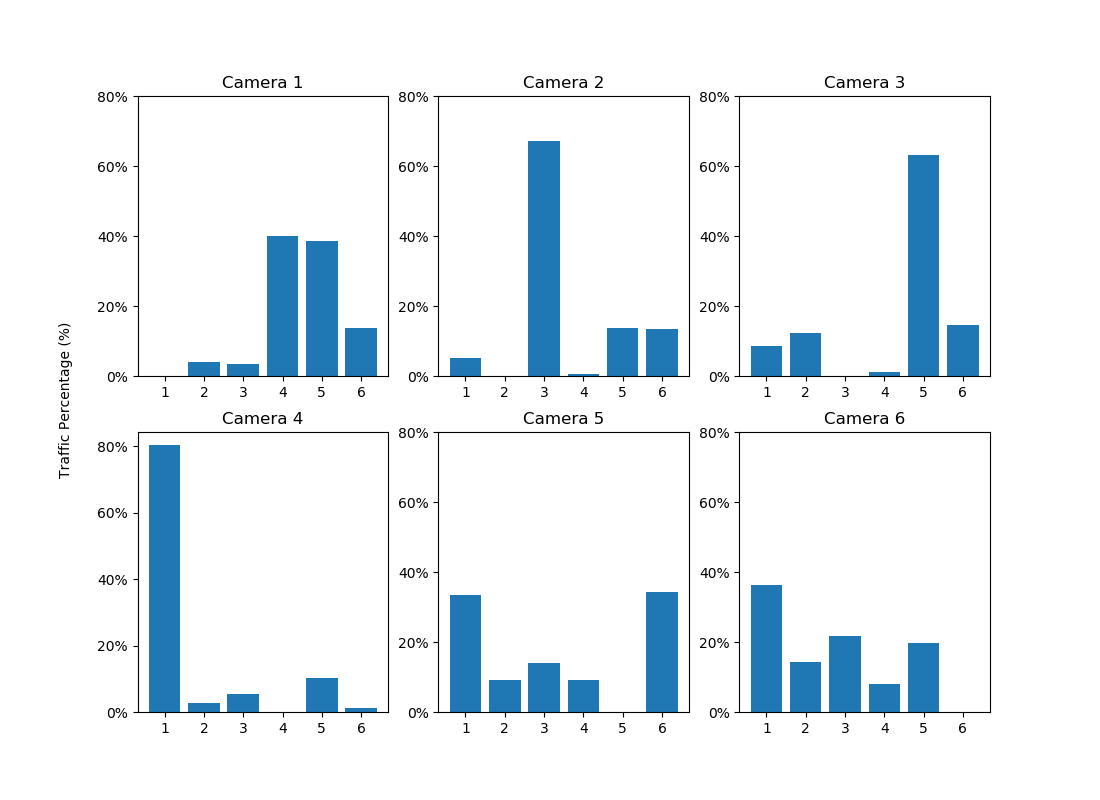

In [9]:
spatio_matrix = np.zeros(shape = (6,6))
df_spatio = pd.DataFrame(data=spatio_matrix, index=[1,2,3,4,5,6], columns=[1,2,3,4,5,6])
for key, value in time_seq_dic.items():
    cam_before_id = key[0]
    cam_after_id = key[1]
    df_spatio.loc[cam_before_id][cam_after_id] = len(value)
print(df_spatio)
df_spatio_normalized = df_spatio.divide(df_spatio.sum(axis=1), axis=0)
print(df_spatio_normalized)

fig = plt.figure(figsize=(11, 8))
fig.text(0.06, 0.5, 'Traffic Percentage (%)', ha='center', va='center', rotation='vertical')
y = [0.0, 0.2, 0.4, 0.6, 0.8]
x = [1, 2, 3, 4, 5, 6]
for index, row in df_spatio_normalized.iterrows():
    ax = plt.subplot(2, 3, index)
    plt.bar(row.index, row.values)
    plt.xticks(x)
    plt.yticks(y)
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    plt.title("Camera " + str(index))

plt.savefig('spatio_matrix.pdf')

<IPython.core.display.Javascript object>


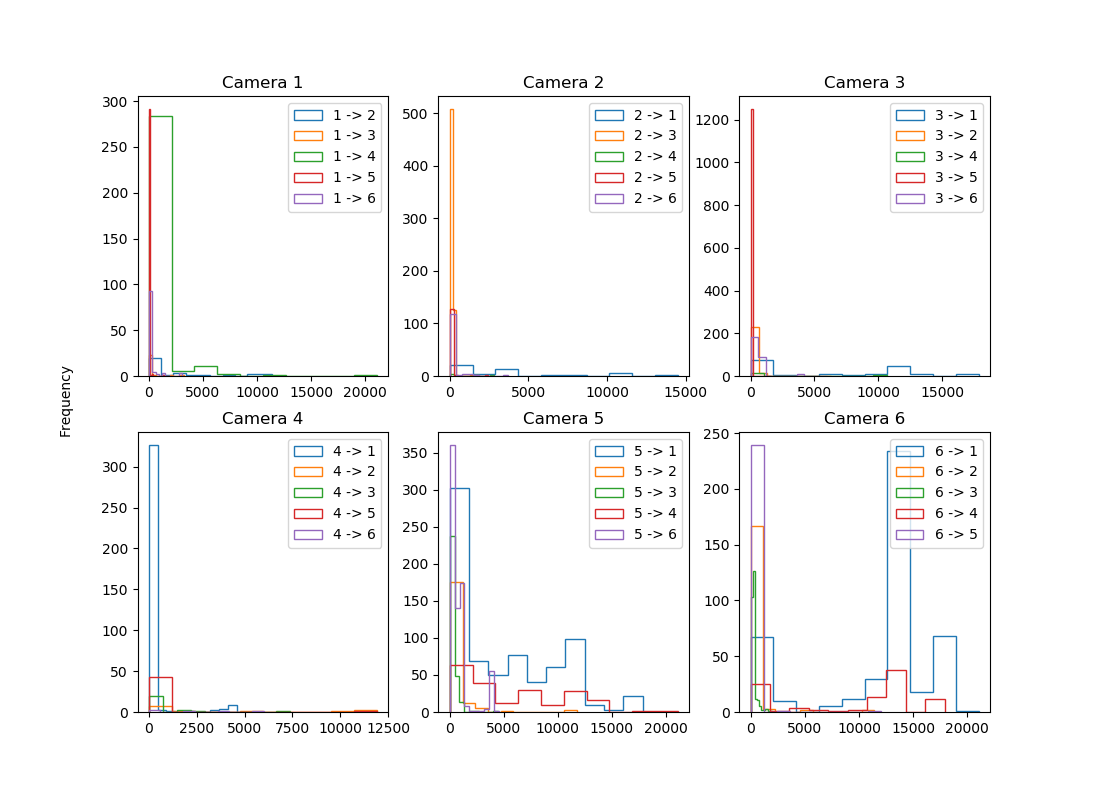

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [29]:
fig = plt.figure(figsize=(11, 8))
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

y = [0, 200, 400, 600, 800, 1200]
cur_key = 0
label=[]
ax = ''
for key, value in time_seq_dic.items():
    time_arr = np.array(value) / 25
    if cur_key == 5:
        ax.legend(label, loc="upper right")
        label = []
        cur_key = 0
    label.append(str(key[0]) + " -> " + str(key[1]) )
    ax = plt.subplot(2, 3, key[0])
    plt.hist(time_arr, histtype=u'step')
    plt.title("Camera " + str(key[0]))
    cur_key = cur_key + 1
ax.legend(label, loc="upper right")
plt.savefig('temporal_matrix.pdf')

In [ ]:
# files = os.listdir("./gt_bbox")
# print("num of files: ",len(files))
# pool = [1, 2, 3, 4, 5, 6]
# comb = []
# for x in combinations(pool, 2):
#     comb.append(str(x))
# data = np.zeros(shape= (15,  6))


In [ ]:
# df = pd.DataFrame(data, columns = ["s1", "s2", "s3", "s4", "s5", "s6"],
#     index=comb)
# df.index.name = "Camera pairs"
# print(df)

In [ ]:
# print(type(df.index[0]))
# print(df.loc["(1, 2)"]["s1"])

In [ ]:
# cur_obj = 1
# seq_dic = {"s" + str(i):[] for i in range(1, 7)}
# for file in files:
#     if file == "Thumbs.db":
#         continue
#     obj_id = int(file[:4])
#     camera_id = int(file[6])
#     seq_num = file[7:9]
#     if obj_id != cur_obj:
        
#         pool = seq_dic[seq_num]
#         comb = []
#         for x in combinations(pool, 2):
#             if x[0] != x[1]:
#                 comb.append(str(x))
#         for ele in comb:
#             df.loc[ele][seq_num] = df.loc[ele][seq_num] + 1
        
#         seq_dic = {"s" + str(i):[] for i in range(1, 7)}
#         cur_obj = obj_id
#     seq_dic[seq_num].append(camera_id)
# print(df)

In [ ]:
df.to_csv("spatio_temporal_matrix.csv", encoding="utf-8")